In [ ]:
import pandas as pd
from sklearn import preprocessing
from sklearn.linear_model import LogisticRegression
import seaborn as sns                       #visualisation
from sklearn.model_selection import train_test_split
import os
import numpy as np
import matplotlib.pyplot as plt             #visualisation
%matplotlib inline                          

In [ ]:
my=pd.read_csv('personel_bank.csv')

In [ ]:
my.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
my.tail()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
4995,4996,29,3,40,92697,1,1.9,3,0,0,0,0,1,0
4996,4997,30,4,15,92037,4,0.4,1,85,0,0,0,1,0
4997,4998,63,39,24,93023,2,0.3,3,0,0,0,0,0,0
4998,4999,65,40,49,90034,3,0.5,2,0,0,0,0,1,0
4999,5000,28,4,83,92612,3,0.8,1,0,0,0,0,1,1


**1.Checking the type of data's and summary stats**

In [ ]:
my.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
my.describe()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
count,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.000000,5000.00000,5000.000000,5000.000000
mean,2500.500000,45.338400,20.104600,73.774200,93152.503000,2.396400,1.937938,1.881000,56.498800,0.096000,0.104400,0.06040,0.596800,0.294000
std,1443.520003,11.463166,11.467954,46.033729,2121.852197,1.147663,1.747659,0.839869,101.713802,0.294621,0.305809,0.23825,0.490589,0.455637
min,1.000000,23.000000,-3.000000,8.000000,9307.000000,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
25%,1250.750000,35.000000,10.000000,39.000000,91911.000000,1.000000,0.700000,1.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000
50%,2500.500000,45.000000,20.000000,64.000000,93437.000000,2.000000,1.500000,2.000000,0.000000,0.000000,0.000000,0.00000,1.000000,0.000000
75%,3750.250000,55.000000,30.000000,98.000000,94608.000000,3.000000,2.500000,3.000000,101.000000,0.000000,0.000000,0.00000,1.000000,1.000000
max,5000.000000,67.000000,43.000000,224.000000,96651.000000,4.000000,10.000000,3.000000,635.000000,1.000000,1.000000,1.00000,1.000000,1.000000


**2. Dropping the unrequired columns**


In [ ]:
my.isnull().sum()

ID                    0
Age                   0
Experience            0
Income                0
ZIP Code              0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64

In [ ]:
my.Online.sum()

2984

In [ ]:
my.Experience

0        1
1       19
2       15
3        9
4        8
        ..
4995     3
4996     4
4997    39
4998    40
4999     4
Name: Experience, Length: 5000, dtype: int64

In [ ]:
ex = my['Experience']
ag = my['Age']
cor = ex.corr(ag)
cor

0.9942148569683321

In [ ]:
my = my.drop(['ID','ZIP Code'],axis=1)
my.head()

,Age,Experience,Income,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,1,49,4,1.6,1,0,0,1,0,0,0
1,45,19,34,3,1.5,1,0,0,1,0,0,0
2,39,15,11,1,1.0,1,0,0,0,0,0,0
3,35,9,100,1,2.7,2,0,0,0,0,0,0
4,35,8,45,4,1.0,2,0,0,0,0,0,1


In [ ]:
my = my.dropna()
my.count()

Age                   5000
Experience            5000
Income                5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [ ]:
print(my.isnull().sum())

Age                   0
Experience            0
Income                0
Family                0
CCAvg                 0
Education             0
Mortgage              0
Personal Loan         0
Securities Account    0
CD Account            0
Online                0
CreditCard            0
dtype: int64


**Finding the unique elements in the dataset**

In [ ]:
my.apply(lambda x: len(x.unique()))

Age                    45
Experience             47
Income                162
Family                  4
CCAvg                 108
Education               3
Mortgage              347
Personal Loan           2
Securities Account      2
CD Account              2
Online                  2
CreditCard              2
dtype: int64

**Finding people with zero mortgage**

In [ ]:
my[my['Mortgage'] == 0]['Mortgage'].count()


3462

**Number of people with zero credit card spending per month**

In [ ]:
my[my['CCAvg'] == 0]['CCAvg'].count()


106

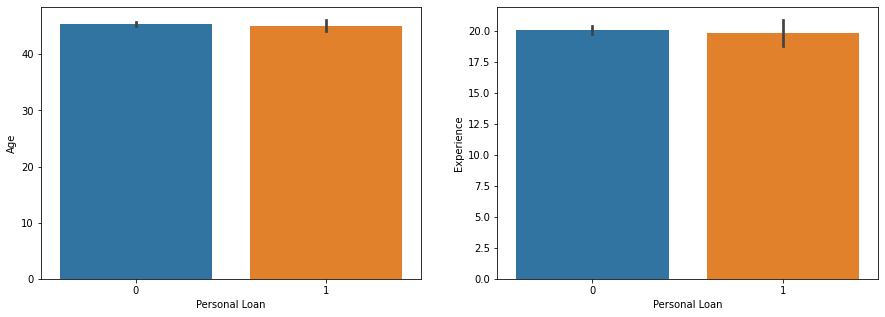

In [ ]:
plt.figure(figsize=(15,5))
plt.subplot(1,2,1)
sns.barplot(my['Personal Loan'], my['Age'])
plt.subplot(1,2,2)
sns.barplot(my['Personal Loan'], my['Experience'])

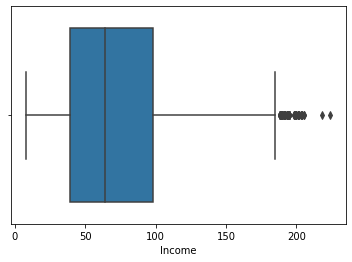

In [ ]:
sns.boxplot(x=my['Income'])

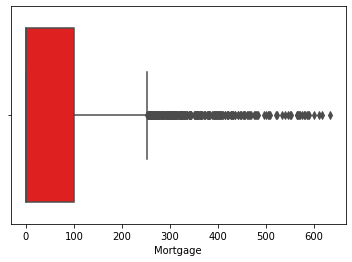

In [ ]:
sns.boxplot(x=my['Mortgage'], color='red')

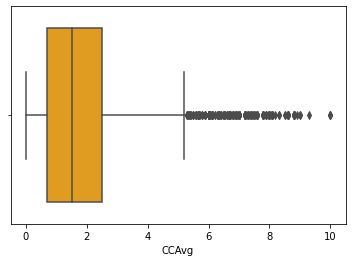

In [ ]:
sns.boxplot(x=my['CCAvg'], color='orange')

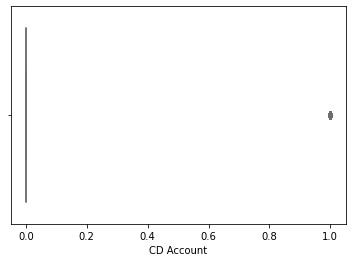

In [ ]:
sns.boxplot(x=my['CD Account'], color='violet')

In [ ]:
q1 = my.quantile(0.25)
q3 = my.quantile(0.75)
IQR = q3-q1
print(IQR)

Age                    20.0
Experience             20.0
Income                 59.0
Family                  2.0
CCAvg                   1.8
Education               2.0
Mortgage              101.0
Personal Loan           0.0
Securities Account      0.0
CD Account              0.0
Online                  1.0
CreditCard              1.0
dtype: float64


In [ ]:
df = df[~((df < (q1 - 1.5 * IQR)) | (df > (q3 + 1.5 * IQR ))).any(axis = 1)]
df.shape

(3645, 14)

In [ ]:
c = my['Income'].value_counts()*100/sum(df['Income'].value_counts())
print(c)

44     2.331962
38     2.304527
81     2.277092
41     2.249657
39     2.222222
         ...   
189    0.054870
202    0.054870
205    0.054870
224    0.027435
218    0.027435
Name: Income, Length: 162, dtype: float64


In [ ]:
pl = c.index[:10]

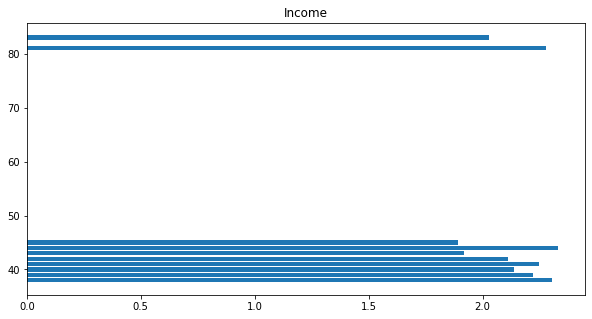

In [ ]:
# plotting a bar graph of Income 
plt.figure(figsize = (10,5))
plt.barh(pl, width = c[:10])
plt.title('Income')
plt.show()

**Calculating Correlation matrix**

In [ ]:
my.corr()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
Age,1.000000,-0.055269,-0.029216,-0.046418,-0.052012,0.041334,-0.012539,-0.007726,-0.000436,0.008043,0.013702,0.007681
Income,-0.055269,1.000000,-0.016410,-0.157501,0.645984,-0.187524,0.206806,0.502462,-0.002616,0.169738,0.014206,-0.002385
ZIP Code,-0.029216,-0.016410,1.000000,0.011778,-0.004061,-0.017377,0.007383,0.000107,0.004704,0.019972,0.016990,0.007691
Family,-0.046418,-0.157501,0.011778,1.000000,-0.109275,0.064929,-0.020445,0.061367,0.019994,0.014110,0.010354,0.011588
CCAvg,-0.052012,0.645984,-0.004061,-0.109275,1.000000,-0.136124,0.109905,0.366889,0.015086,0.136534,-0.003611,-0.006689
Education,0.041334,-0.187524,-0.017377,0.064929,-0.136124,1.000000,-0.033327,0.136722,-0.010812,0.013934,-0.015004,-0.011014
Mortgage,-0.012539,0.206806,0.007383,-0.020445,0.109905,-0.033327,1.000000,0.142095,-0.005411,0.089311,-0.005995,-0.007231
Personal Loan,-0.007726,0.502462,0.000107,0.061367,0.366889,0.136722,0.142095,1.000000,0.021954,0.316355,0.006278,0.002802
Securities Account,-0.000436,-0.002616,0.004704,0.019994,0.015086,-0.010812,-0.005411,0.021954,1.000000,0.317034,0.012627,-0.015028
CD Account,0.008043,0.169738,0.019972,0.014110,0.136534,0.013934,0.089311,0.316355,0.317034,1.000000,0.175880,0.278644


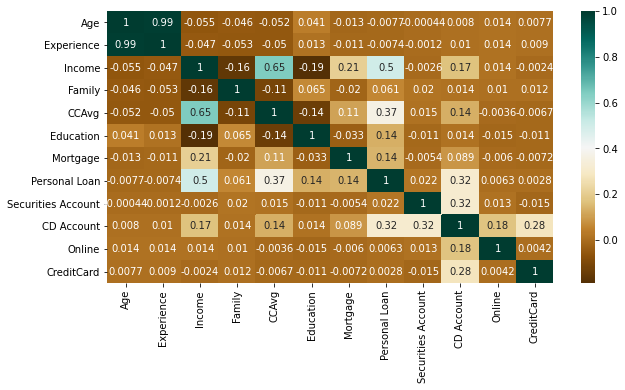

In [ ]:
#plotting the heatmap for all the parameters currently present in the dataset
plt.figure(figsize=(10,5))
co = my.corr()
sns.heatmap(co,cmap = "BrBG",annot = True)

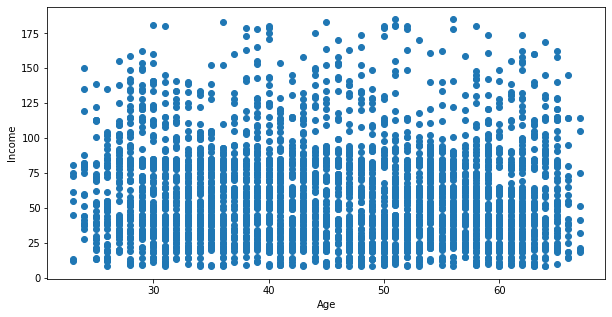

In [ ]:
# plotting the point graph between Income and Age
fig, point = plt.subplots(figsize = (10,5))
point.scatter(df['Age'],df['Income'])
point.set_xlabel('Age')
point.set_ylabel('Income')
plt.show()

In [ ]:
my.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   ZIP Code            5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 507.8 KB


Text(0.5, 0, 'Age')

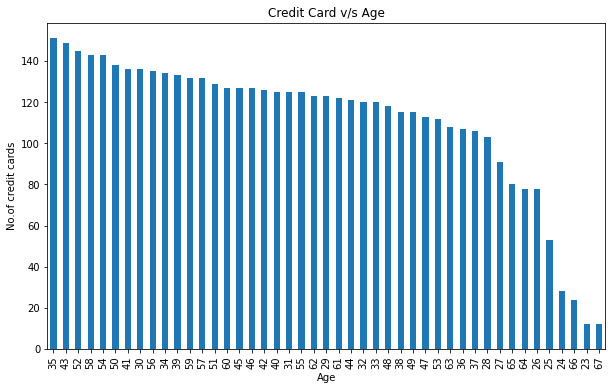

In [ ]:
my['Age'].value_counts().plot.bar(figsize = (10,6))
plt.title("Credit Card v/s Age")
plt.ylabel('No.of credit cards')
plt.xlabel('Age')

Text(0.5, 0, 'Securities Account')

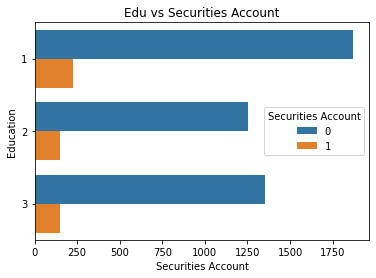

In [ ]:
sns.countplot(y='Education', data = my , hue = 'Securities Account')
plt.title('Edu vs Securities Account')
plt.ylabel('Education')
plt.xlabel('Securities Account')

In [ ]:
my.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5000 entries, 0 to 4999
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   Age                 5000 non-null   int64  
 1   Income              5000 non-null   int64  
 2   ZIP Code            5000 non-null   int64  
 3   Family              5000 non-null   int64  
 4   CCAvg               5000 non-null   float64
 5   Education           5000 non-null   int64  
 6   Mortgage            5000 non-null   int64  
 7   Personal Loan       5000 non-null   int64  
 8   Securities Account  5000 non-null   int64  
 9   CD Account          5000 non-null   int64  
 10  Online              5000 non-null   int64  
 11  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(11)
memory usage: 667.8 KB


In [ ]:
x=my[['Age','Income','CCAvg','Education','Mortgage','Securities Account']]
y=my['Personal Loan'].values

In [ ]:
from sklearn.preprocessing import StandardScaler
Sc_x = StandardScaler()
Sc_y = StandardScaler()
x = Sc_x.fit_transform(x)
y = Sc_y.fit_transform(y.reshape(-1,1))

In [ ]:
train_x,test_x,train_y,test_y = train_test_split(x,y,test_size = 0.3, random_state = 0)

In [ ]:
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(3500, 6) (1500, 6) (3500, 1) (1500, 1)


In [ ]:
my.head()

,Age,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,25,49,91107,4,1.6,1,0,0,1,0,0,0
1,45,34,90089,3,1.5,1,0,0,1,0,0,0
2,39,11,94720,1,1.0,1,0,0,0,0,0,0
3,35,100,94112,1,2.7,2,0,0,0,0,0,0
4,35,45,91330,4,1.0,2,0,0,0,0,0,1


**3. The final Testing and Training Part**

In [ ]:
fina = pd.read_csv('personel_bank.csv')

In [ ]:
fina.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
fina.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5000 entries, 0 to 4999
Data columns (total 14 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   ID                  5000 non-null   int64  
 1   Age                 5000 non-null   int64  
 2   Experience          5000 non-null   int64  
 3   Income              5000 non-null   int64  
 4   ZIP Code            5000 non-null   int64  
 5   Family              5000 non-null   int64  
 6   CCAvg               5000 non-null   float64
 7   Education           5000 non-null   int64  
 8   Mortgage            5000 non-null   int64  
 9   Personal Loan       5000 non-null   int64  
 10  Securities Account  5000 non-null   int64  
 11  CD Account          5000 non-null   int64  
 12  Online              5000 non-null   int64  
 13  CreditCard          5000 non-null   int64  
dtypes: float64(1), int64(13)
memory usage: 547.0 KB


In [ ]:
cols=['a','b','c','d','e','f','g','h','i','j','k','l','m']

In [ ]:
fina.head()

,ID,Age,Experience,Income,ZIP Code,Family,CCAvg,Education,Mortgage,Personal Loan,Securities Account,CD Account,Online,CreditCard
0,1,25,1,49,91107,4,1.6,1,0,0,1,0,0,0
1,2,45,19,34,90089,3,1.5,1,0,0,1,0,0,0
2,3,39,15,11,94720,1,1.0,1,0,0,0,0,0,0
3,4,35,9,100,94112,1,2.7,2,0,0,0,0,0,0
4,5,35,8,45,91330,4,1.0,2,0,0,0,0,0,1


In [ ]:
fina.count()

ID                    5000
Age                   5000
Experience            5000
Income                5000
ZIP Code              5000
Family                5000
CCAvg                 5000
Education             5000
Mortgage              5000
Personal Loan         5000
Securities Account    5000
CD Account            5000
Online                5000
CreditCard            5000
dtype: int64

In [ ]:
features_selection=['Age','Income','CCAvg','Education']

In [ ]:
x_a = fina[features_selection]

y_a = fina['Personal Loan']

In [ ]:
train_x,test_x,train_y,test_y=train_test_split(x_a,y_a,random_state=0)
print(train_x.shape,test_x.shape,train_y.shape,test_y.shape)

(3750, 4) (1250, 4) (3750,) (1250,)


Various types of algorithm

**1.Using the logistic Regression model to calculate the performance.**

In [ ]:
#Using the logistic Regression model to calculate the performance.
from sklearn.linear_model import LogisticRegression

In [ ]:
model=LogisticRegression()
model.fit(train_x,train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
predict_y = model.predict(test_x)
print(predict_y)

[0 0 0 ... 0 0 0]


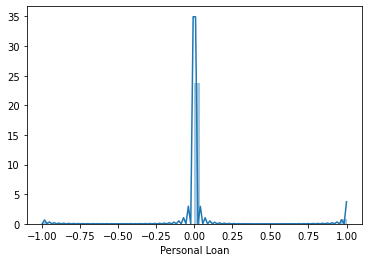

In [ ]:
sns.distplot((test_y - predict_y),bins = 50)

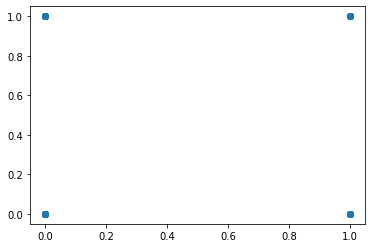

In [ ]:
plt.scatter(test_y,predict_y)

**Claculating the mean absolute error, root mean square error, r2 score and the accuracy of the model.**

In [ ]:
# Claculating the mean absolute error, root mean square error, r2 score and the accuracy of the model.
from sklearn import metrics
print('Mean Absolute Error is : ', metrics.mean_absolute_error(test_y,predict_y))
print('Root Mean Squared Error is : ', np.sqrt(metrics.mean_squared_error(test_y,predict_y)))
print('R2 Score is : ', metrics.r2_score(test_y,predict_y))
print('Accuracy score is : ', metrics.accuracy_score(test_y,predict_y))
print('The Confusion Matrix is : ')
print(metrics.confusion_matrix(test_y, predict_y))


Mean Absolute Error is :  0.0416
Root Mean Squared Error is :  0.2039607805437114
R2 Score is :  0.47298436790555864
Accuracy score is :  0.9584
The Confusion Matrix is : 
[[1129   13]
 [  39   69]]


**Making the classification report of the predicted model**

In [ ]:
from sklearn.metrics import classification_report
# Making the classification report of the predicted model
print(classification_report(test_y,predict_y))


              precision    recall  f1-score   support

           0       0.96      0.99      0.97      1142
           1       0.82      0.59      0.69       108

    accuracy                           0.95      1250
   macro avg       0.89      0.79      0.83      1250
weighted avg       0.95      0.95      0.95      1250



**Finding the recall score of the model**

In [ ]:
# finding the recall score of the model
print('The recall score is : ', metrics.recall_score(test_y,predict_y))

The recall score is :  0.5925925925925926


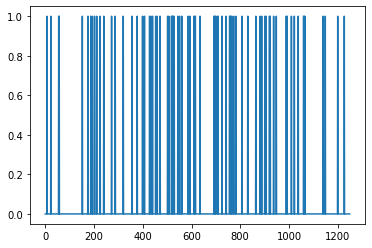

In [ ]:
plt.plot(predict_y)

**Using polynomial function for calculating the performance of the dataset.**

In [ ]:
#using polynomial function for calculating the performance of the dataset.
from sklearn.preprocessing import PolynomialFeatures

polynom_reg = PolynomialFeatures(degree = 4)
poly_x = polynom_reg.fit_transform(train_x)
polynom_reg.fit(poly_x,train_y)
log_reg = LogisticRegression()
log_reg.fit(poly_x, train_y)

/usr/local/lib/python3.6/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

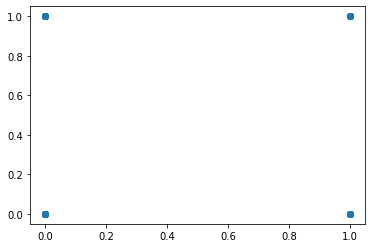

In [ ]:
predict_y = log_reg.predict(polynom_reg.fit_transform(test_x))
plt.scatter(test_y,predict_y)

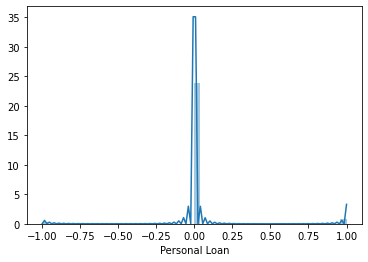

In [ ]:
sns.distplot((test_y-predict_y),bins = 50)

**Claculating the mean absolute error, root mean square error, r2 score and the accuracy of the model.**

In [ ]:
# Claculating the mean absolute error, root mean square error, r2 score and the accuracy of the model.
from sklearn import metrics
print('Mean Absolute Error is : ', metrics.mean_absolute_error(test_y,predict_y))
print('Root Mean Squared Error is : ', np.sqrt(metrics.mean_squared_error(test_y,predict_y)))
print('R2 Score is : ', metrics.r2_score(test_y,predict_y))
print('Accuracy score is : ', metrics.accuracy_score(test_y,predict_y))
A = model.score(test_x, test_y)
print("The accuracy of the Logistic regression model is : ", A)

Mean Absolute Error is :  0.0416
Root Mean Squared Error is :  0.2039607805437114
R2 Score is :  0.47298436790555864
Accuracy score is :  0.9584
The accuracy of the Logistic regression model is :  0.9536


The classification goal is to predict the likelihood of a liability customer buying personal loans.

**2. Naive bayes model**

In [ ]:
from sklearn.impute import SimpleImputer 
im = SimpleImputer(missing_values=np.nan, strategy='mean')
from sklearn import preprocessing
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import accuracy_score


In [ ]:
X = fina.values[:,0:9]
Y = fina.values[:,10]

In [ ]:
train_x, test_x, train_y, test_y = train_test_split(X, Y, test_size = 0.30, random_state = 0)


In [ ]:
cls = GaussianNB()
cls.fit(train_x, train_y)

GaussianNB(priors=None, var_smoothing=1e-09)

In [ ]:
predict_y = cls.predict(test_x)
B=accuracy_score(test_y, predict_y, normalize = True)
print("Naive bayes Accuracy is : ", B)
print("Naive bayes Confusion matrix is : ")
print(metrics.confusion_matrix(test_y,predict_y))

Naive bayes Accuracy is :  0.9033333333333333
Naive bayes Confusion matrix is : 
[[1355    1]
 [ 144    0]]


**3. KNN model**

In [ ]:
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

In [ ]:
X = pd.DataFrame(StandardScaler().fit_transform(fina))
X.columns = fina.columns


In [ ]:
X = np.array(fina.iloc[:,1:11]) 
Y = np.array(fina['Personal Loan'])

In [ ]:
train_X, test_X, train_Y, test_Y = train_test_split(X, Y, test_size=0.3, random_state=0)

In [ ]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score

In [ ]:
# instantiate learning model (k = 1)
k = KNeighborsClassifier(n_neighbors = 7)

# fitting the model
k.fit(train_X, train_Y)

# predict the response
predict_y = k.predict(test_X)

# evaluate accuracy
C=accuracy_score(test_Y, predict_y)   #Accuracy of KNN model
print('Accuracy_score:',C)  
print('Confusion_matrix:')
print(metrics.confusion_matrix(test_Y, predict_y))


Accuracy_score: 0.902
Confusion_matrix:
[[1353    3]
 [ 144    0]]


**4. SVM Model**

In [ ]:
from sklearn.model_selection import train_test_split

# To calculate the accuracy score of the model
from sklearn.metrics import accuracy_score, confusion_matrix

target = fina["Personal Loan"]
features=fina.drop(['ID','ZIP Code','Experience'], axis =1 )
X_train, X_test, y_train, y_test = train_test_split(features,target, test_size = 0.30, random_state = 10)

In [ ]:
from sklearn.svm import SVC

# Building a Support Vector Machine on train data
svc_model= SVC(kernel='linear')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

In [ ]:
# check the accuracy on the training set
print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))

1.0
1.0


In [ ]:
print("Confusion Matrix:\n",confusion_matrix(prediction,y_test))


Confusion Matrix:
 [[1360    0]
 [   0  140]]


In [ ]:
#Store the accuracy results for each kernel in a dataframe for final comparison
resultsfina = pd.DataFrame({'Kernel':['Linear'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsfina = resultsfina[['Kernel', 'Accuracy']]
resultsfina

,Kernel,Accuracy
0,Linear,1.0


In [ ]:
svc_model  = SVC(kernel='poly')
svc_model.fit(X_train, y_train)

prediction = svc_model.predict(X_test)

print(svc_model.score(X_train, y_train))
print(svc_model.score(X_test, y_test))


0.9228571428571428
0.9213333333333333


In [ ]:
#Store the accuracy results for each kernel in a dataframe for final comparison
tempResultsfina = pd.DataFrame({'Kernel':['Poly'], 'Accuracy': svc_model.score(X_train, y_train)})
resultsfina = pd.concat([resultsfina, tempResultsfina])
resultsfina = resultsfina[['Kernel', 'Accuracy']]
resultsfina


,Kernel,Accuracy
0,Linear,1.000000
0,Poly,0.922857


**Comparison of different Models:**

In [ ]:
print(A) #Accuracy of Logistic regression model


0.9536


In [ ]:
print(B) #Accuracy of Naive Bayes' Model


0.9033333333333333


In [ ]:
print(C)  #Accuracy of KNN Model


0.902


In [ ]:
resultsfina #Accuracy of SVM Model


,Kernel,Accuracy
0,Linear,1.000000
0,Poly,0.922857


As you can see the logistic model is giving an accuracy of 95.36% compared to other models for predicting the likelihood of a liability customer buying personal loans. 